[(1, 3.0), (2, 6.0), (3, 8.0), (4, 9.0), (5, 9.0), (6, 9.0)]


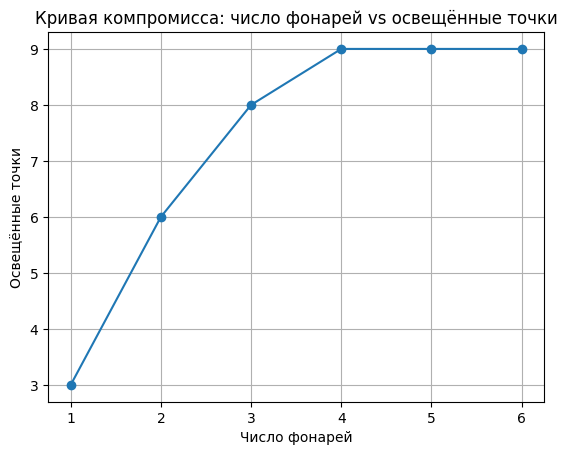

In [ ]:
from pulp import *
import matplotlib.pyplot as plt

demand_points = list(range(9)) # номера точек, которые нужно осветить
facility_points = list(range(6)) # номера возможных мест установки фонарей

coverage = { # задаем "радиус" каждого фонаря, пока что вручную, позже исправлю
    0: [0, 1],
    1: [1, 2, 3],
    2: [3, 4],
    3: [4, 5, 6],
    4: [6, 7],
    5: [7, 8],
}

results = []

for max_lamps in range(1, 7):
    prob = LpProblem("MCLP_StreetLights", LpMaximize)
    x = LpVariable.dicts("lamp", facility_points, 0, 1, LpBinary) # 1 - установлен, 0 - нет
    y = LpVariable.dicts("covered", demand_points, 0, 1, LpBinary) # 1 - освещена, 0 - нет

    prob += lpSum(y[i] for i in demand_points) # максимизируем сумму освещенных точек
    prob += lpSum(x[j] for j in facility_points) <= max_lamps # ограничение кол.-ва фонарей

    for i in demand_points:
        covering = [j for j in facility_points if i in coverage.get(j, [])]
        prob += y[i] <= lpSum(x[j] for j in covering)

    prob.solve()

    total_covered = sum(y[i].varValue for i in demand_points)
    results.append((max_lamps, total_covered))
    
print(results)

# строим график
x_vals, y_vals = zip(*results)

plt.plot(x_vals, y_vals, marker='o')
plt.title("Кривая компромисса: число фонарей vs освещённые точки")
plt.xlabel("Число фонарей")
plt.ylabel("Освещённые точки")
plt.grid(True)
plt.show()
